<a href="https://colab.research.google.com/github/AndrewOrozco/CursoGit/blob/master/Pocos_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile
import os
import shutil
from pathlib import Path

In [3]:
ruta = Path('/content/data.zip')

with zipfile.ZipFile(ruta, 'r') as zip_ref:
    zip_ref.extractall()

Found 2503 images belonging to 2 classes.
Found 360 images belonging to 2 classes.
Epoch 1/30
79/79 [==============================] - 22s 262ms/step - loss: 0.2243 - accuracy: 0.8937 - val_loss: 0.2035 - val_accuracy: 0.8333
Epoch 2/30
79/79 [==============================] - 19s 240ms/step - loss: 0.1059 - accuracy: 0.9545 - val_loss: 0.1444 - val_accuracy: 0.8389
Epoch 3/30
79/79 [==============================] - 26s 331ms/step - loss: 0.0790 - accuracy: 0.9764 - val_loss: 0.1102 - val_accuracy: 1.0000
Epoch 4/30
79/79 [==============================] - 20s 251ms/step - loss: 0.0692 - accuracy: 0.9908 - val_loss: 0.1041 - val_accuracy: 1.0000
Epoch 5/30
79/79 [==============================] - 20s 251ms/step - loss: 0.0663 - accuracy: 0.9940 - val_loss: 0.0997 - val_accuracy: 1.0000
Epoch 6/30
79/79 [==============================] - 21s 258ms/step - loss: 0.0657 - accuracy: 0.9940 - val_loss: 0.0954 - val_accuracy: 1.0000
Epoch 7/30
79/79 [==============================] - 20s 250

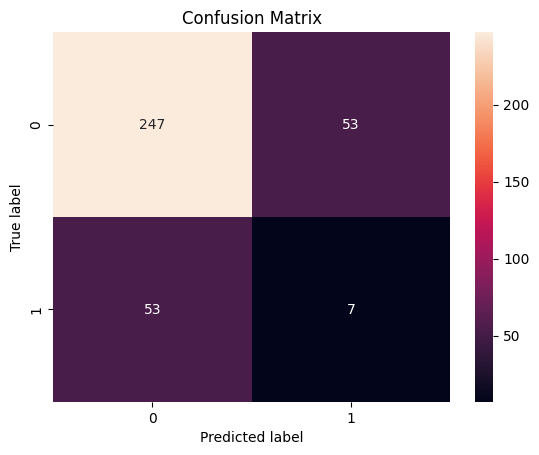

              precision    recall  f1-score   support

      Andrew       0.82      0.82      0.82       300
        Olga       0.12      0.12      0.12        60

    accuracy                           0.71       360
   macro avg       0.47      0.47      0.47       360
weighted avg       0.71      0.71      0.71       360



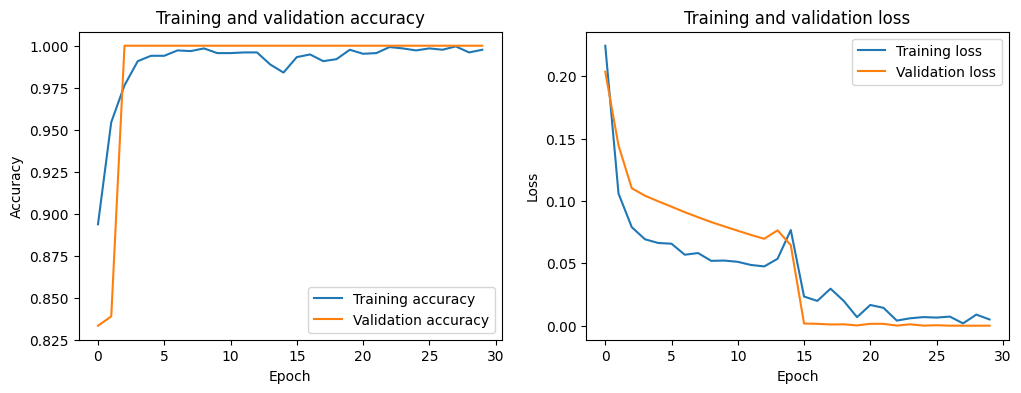

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Configurar rutas
train_dir = '/content/data/entrenamiento/'
test_dir = '/content/data/Prueba/'

# Generador de datos con aumento para entrenamiento y sin aumento para prueba
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

# Definir el modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_generator, epochs=30, validation_data=test_generator)

# Evaluar el modelo en el conjunto de datos de prueba
loss, accuracy = model.evaluate(test_generator)
print(f'Precisión en el conjunto de datos de prueba: {accuracy * 100:.2f}%')

# Evaluar el modelo y mostrar la matriz de confusión
Y_pred = model.predict(test_generator)
y_pred = np.round(Y_pred).astype(int)
cm = confusion_matrix(test_generator.classes, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

# Graficar precisión y pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [9]:
ruta = Path('/content/Carla.zip')

with zipfile.ZipFile(ruta, 'r') as zip_ref:
    zip_ref.extractall()

Found 2607 images belonging to 3 classes.
Found 508 images belonging to 3 classes.
Epoch 1/30
82/82 [==============================] - 21s 243ms/step - loss: 0.4566 - accuracy: 0.8604 - val_loss: 0.5092 - val_accuracy: 0.7421
Epoch 2/30
82/82 [==============================] - 21s 260ms/step - loss: 0.2032 - accuracy: 0.9256 - val_loss: 0.4923 - val_accuracy: 0.8622
Epoch 3/30
82/82 [==============================] - 22s 272ms/step - loss: 0.1110 - accuracy: 0.9601 - val_loss: 0.0578 - val_accuracy: 0.9843
Epoch 4/30
82/82 [==============================] - 20s 240ms/step - loss: 0.0764 - accuracy: 0.9762 - val_loss: 0.1340 - val_accuracy: 0.9469
Epoch 5/30
82/82 [==============================] - 22s 273ms/step - loss: 0.0531 - accuracy: 0.9831 - val_loss: 0.0699 - val_accuracy: 0.9803
Epoch 6/30
82/82 [==============================] - 20s 241ms/step - loss: 0.0469 - accuracy: 0.9854 - val_loss: 0.0206 - val_accuracy: 0.9980
Epoch 7/30
82/82 [==============================] - 24s 288

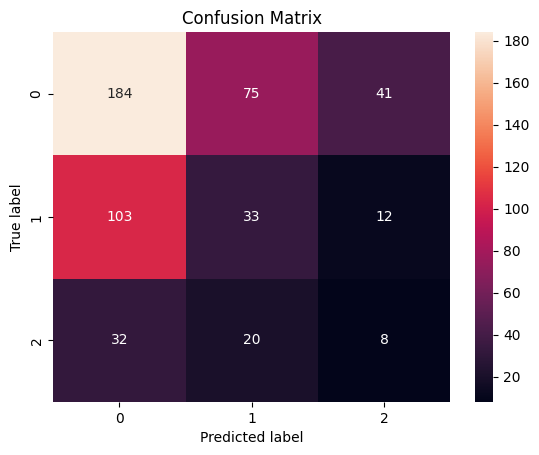

              precision    recall  f1-score   support

      Andrew       0.58      0.61      0.59       300
       Carla       0.26      0.22      0.24       148
        Olga       0.13      0.13      0.13        60

    accuracy                           0.44       508
   macro avg       0.32      0.32      0.32       508
weighted avg       0.43      0.44      0.44       508



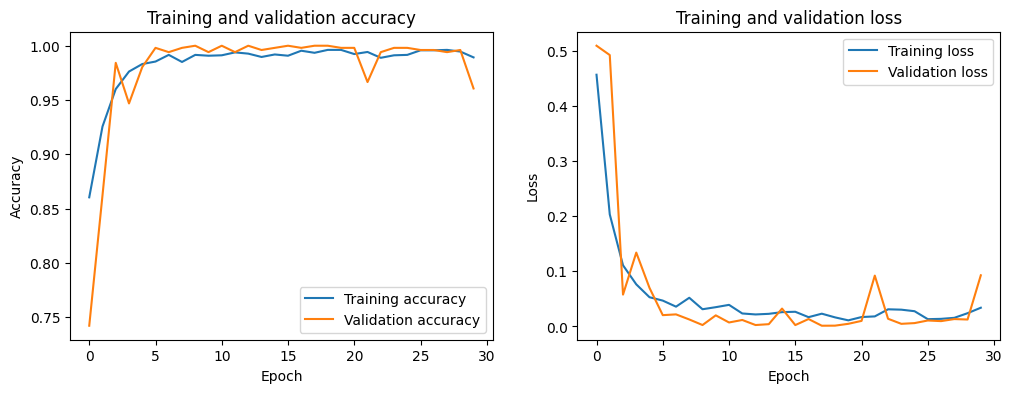

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import os
import shutil
import random

# Función para mover el 20% de las imágenes de entrenamiento a prueba
def mover_imagenes(origen, destino, porcentaje):
    fotos = [f for f in os.listdir(origen) if f.endswith('.jpg') or f.endswith('.png')]
    random.shuffle(fotos)
    cantidad_a_mover = int(len(fotos) * porcentaje)
    fotos_a_mover = fotos[:cantidad_a_mover]
    if not os.path.exists(destino):
        os.makedirs(destino)
    for foto in fotos_a_mover:
        shutil.move(os.path.join(origen, foto), os.path.join(destino, foto))

# Mover el 20% de las imágenes de 'Carla' a la carpeta de pruebas
origen = '/content/data/entrenamiento/Carla'
destino = '/content/data/Prueba/Carla'
mover_imagenes(origen, destino, 0.2)

# Configurar rutas
train_dir = '/content/data/entrenamiento/'
test_dir = '/content/data/Prueba/'

# Generador de datos con aumento para entrenamiento y sin aumento para prueba
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Definir el modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Ajustar la salida para múltiples clases
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_generator, epochs=30, validation_data=test_generator)

# Evaluar el modelo en el conjunto de datos de prueba
loss, accuracy = model.evaluate(test_generator)
print(f'Precisión en el conjunto de datos de prueba: {accuracy * 100:.2f}%')

# Evaluar el modelo y mostrar la matriz de confusión
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

# Graficar precisión y pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [16]:
# Guardar el modelo entrenado
model.save('modelo_entrenado.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 187ms/step


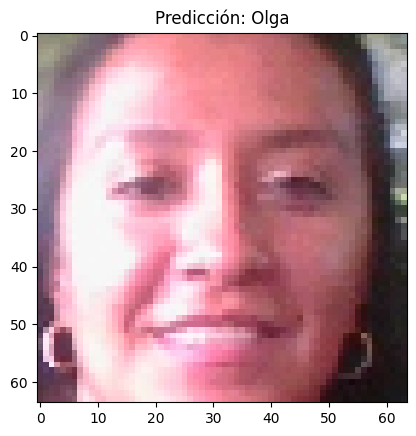

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Cargar el modelo
model = tf.keras.models.load_model('/content/modelo_entrenado.h5')

# Definir el umbral de confianza
threshold = 0.6  # Puedes ajustar este valor según tus necesidades

# Cargar y preprocesar la imagen
img_path = '/content/Preuba_Olga.jpg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Asegúrate de que el preprocesamiento coincide con el del entrenamiento

# Realizar la predicción
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
confidence = np.max(predictions)

# Definir las etiquetas de las clases
class_labels = ['Andrew', 'Carla', 'Olga']

# Verificar si la confianza es mayor que el umbral
if confidence > threshold:
    predicted_label = class_labels[predicted_class]
else:
    predicted_label = 'Desconocido'

# Mostrar la imagen y la predicción
plt.imshow(img)
plt.title(f'Predicción: {predicted_label}')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargar el modelo ResNet50 preentrenado en ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Añadir capas personalizadas para tu tarea específica
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(3, activation='softmax')(x)  # Ajusta la salida según el número de clases

# Crear el modelo completo
model = Model(inputs=base_model.input, outputs=x)

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Preparar los datos
train_datagen = ImageDataGenerator(rescale=0.5)
train_generator = train_datagen.flow_from_directory(
    '/content/data/entrenamiento',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=0.5)
validation_generator = validation_datagen.flow_from_directory(
    '/content/data/Prueba',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Entrenar el modelo
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

# # Guardar el modelo entrenado
# model.save('your_model.h5')

# Evaluar el modelo y mostrar la matriz de confusión
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

# Graficar precisión y pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()



Found 2607 images belonging to 3 classes.
Found 508 images belonging to 3 classes.
Epoch 1/10
14/81 [====>.........................] - ETA: 7:05 - loss: 1.1413 - accuracy: 0.8281